# DenseNet논문 톺아보기

DenseNet은 ResNet이후에 나온 논문으로 실험 결과에 대해 개선 부분을 체크해서 나온 논문입니다.

DenseNet은 ResNet의 shortcut connection을  FC Layer처럼 촘촘히 가지도록 한다면 더욱 성능 개선 효과가 클 것이라고 생각하고 이를 실험으로 입증해 보였습니다.

https://arxiv.org/pdf/1608.06993.pdf

---

## Abstract

Shorter connection을  입력 레이어와 출력 레이어 사이에 넣게 되면 효율적으로 더 깊고 정확하게 학습이 가능합니다

이 논문은 바로 이 부분에 관점을 통해서, feed-forward방식으로 layer들끼리 연결된 DenseNet을 보여주고 있습니다.

간략하게, DenseNet을 설명을 하겠습니다.

먼저, CNN은 각 layer들의 연결이 이전 layer만 연결이 되는 L-connection방식이지만, DenseNet은 L(L+1)/2개의 connection방식입니다.

그러므로, ResNet은 특성맵끼리의 더하기 방식이었다면 DenseNet는 특성 맵끼리의 연쇄성을 갖는 방식입니다.

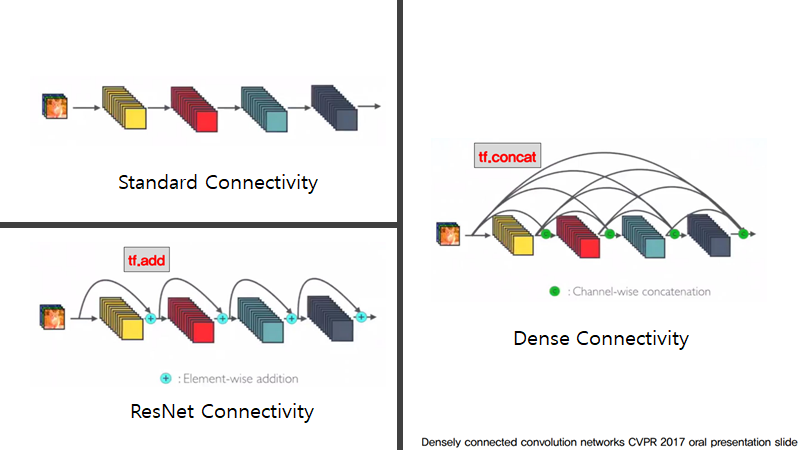

이로 인해, 각 layer은 모든 이전의 layer의 특성맵이 입력으로 사용이되고, 각 특성맵은 모든 후속 layer의 입력이 되는 관계를 갖게 됩니다.

이러한 구조가 주는 장점은 크게 4가지가 있습니다.

- Vanishing-gradient 문제 완화

- 견고한 feature propagation

- Feature reuse장려

- Parameter 수의 감소

- State-of-art에 비해 개선됨

- 적은 양의 계산으로 high performance달성

---
## Introduction

이 부분에서는 deep CNN연구문제와 해결한 노력에 대해서 서술이 되어있고 이 노력의 결과를 통해서 저자는 Dense connectivity pattern을 생각해낸 것들이 담겨있습니다.

CNN을 점점 깊게 쌓으려는 노력을 했고 그로 인해 LeNet5, VGG19, Highway Network, ResNet까지 발전을 이뤘습니다.

물론 이렇게 깊게 쌓게 되면 문제가 생깁니다.

- 입력이나 그레디언트가 레이어를 거칠 때 마다 손실이나 사라져버리게 되는 것입니다.

그리고 현재는 이 문제를 다양한 모델로 해결을 했습니다.

- ResNet and Highway Network: 입력값을 그대로 보내기 layer를 건너뛰는 방식을 추구합니다(Identity connection)

- Stochastic depth: 학습 중에 레이어를 무작위로 없애서 ResNet을 단축시키는 것으로 information/gradient flow개선합니다.

- FractalNet는 여러 개의 parrallel layer sequence와 서로 다른 수의 컨볼루션 블록을 반복적으로 결합하여 짧은 깊이를 large depth로 만들어준다.

위의 세 가지 접근 방식은 구조나 절차는 다르지만 공통점이 있습니다.

그것은 앞에 있는 layer가 그 다음에 있는 layer로 가는 short path를 만드는 것입니다.

아직은 무슨 말인지 몰라도 점점 읽다보면 이해가될 것입니다. 

논문으로 돌아와서, 이러한 여러 가지 방식으로 비롯된 핵심 내용을 바탕으로 simple connectivity pattern의 구조를 발표했습니다.

이는 layer간의 정보흐름을 극대화시켜서 동일한 특성맵 사이즈를 갖는 layer가 직접 연결되도록 합니다.

자세하게 설명하자면, Feed-forward특성 유지를 위해  각 layer는 선행 레이어 + additional input이 되고, 각 특성맵은 후속 layer로 전달이 된다.

즉, features들이 layer로 전달되는 과정이 연쇄적으로 진행이 되는 겁니다.

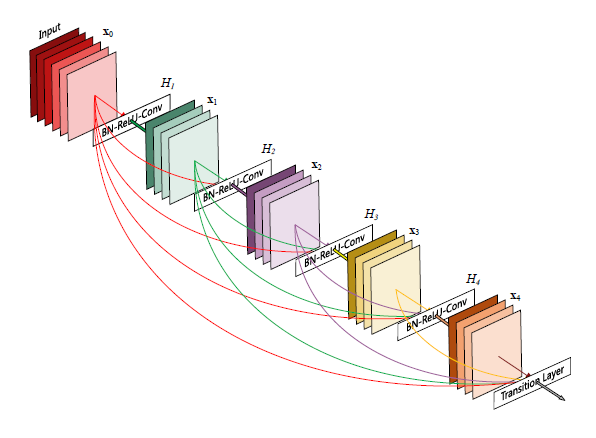

정리를 하자면,ℓth layer는 모든 선행 conv_block의 특성맵으로 구성된 ℓ개를 입력으로 갖고, 특성맵은 L-ℓ가 후속 layer로 전달이 됩니다.

우리는 이러한 Dense conectivity pattern을 갖는 구조를 DensceNet라고 부릅니다.

이제부터는 DenseNet에 대한 장점을 간략하게 이야기해보겠습니다.

- Dense Convolutional Network 

DenseNet에서는 Dense connectiviy pattern에 중복되는 feature map을 다시 학습할 필요가 없어서 기존보다 적은 수의 파라미터만 필요하게 됩니다.

DenseNet는 추가된 정보와 보존된 정보를 구분한다

- 연쇄성과 feature resue of Feaure map


DenseNet의 layer는 매우 좁고 네트워크의 모이는 정보들을 적은 수의 feature map에만 추가하고 나머지는 변경하지 않습니다. 그리고 classifier는 네트워크의 모든 feature-map기반하여 결정하는 것입니다.

- Deeply Supervised Network

각 Layer은 손실 함수와 기존 입력값으로부터 그레디언트를 엑세스할 수 있고 유사한 deep supervision이 이루어지기 때문에 나중에 깊은 네트워크 아키텍처 학습에 도움이 됩니다.

- Stochastic depth

Dense connection은 정규화 효과를 포함하고 이기에 더 작은 훈련 셋에 대한 과적합을 줄입니다.

---

## Related Work

사실 네트워크 아키텍체에 대한 연구는 거의 40년 가까이 되었고, 현재 Neural Network연구의 인기가 상승하면서 이 분야 또한 활발해지는 추세입니다.

인기가 상승한 이유는 최신 네트워크들의 레이어수는 점점 깊어지고 이로 인해 아키텍처간의 성능 차이가 늘어나게 되는 사실을 알게되어 connectivity pattern의 탐구의 중요성이 부각이 되었기 때문입니다.


*현재까지 어떤 네트워크 연구들이 이뤄졌는지에 대해서 이야기를 해드리겠습니다. 이런 연구가 있었구나 정도라만 생각하시는 걸 권장드립니다.*

- Cascade structure는 full connected MLP를 layer-by-layer방식으로 학습하는 구조에 중심을 둔 연구입니다.

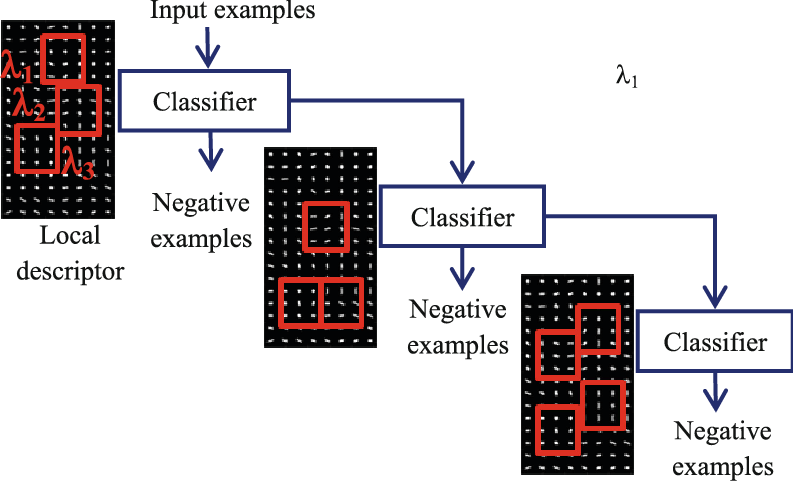

- Fully connected casacade network는 batch gradient descent로 학습이 되었고, 작은 데이터 셋에선 효과적이지만 파라미터가 수 백개인 네트워크로만 확장이 가능합니다.

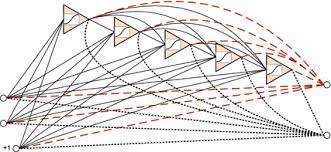


- AdaNet은 DenseNet과 유사 구조를 가진 cross layer connection 네트워크를 위한 이론적 기틀을 다지기 위한 연구를 했습니다.

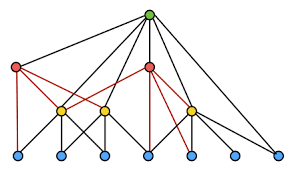


- Highway Networks는 100개 이상 레이어로 이루어진 end to end를 효과적으로 학습시키는 것으로 Gating unit과 bypassing path사용하면 어렵지 않게 최적화도 가능합니다

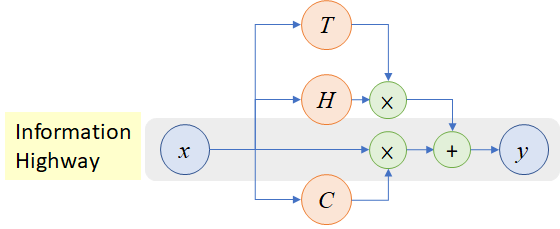

Bypassing path(우회 경로)는 깊은 네트워크 학습에 중요하게 쓰이고 훗날 ResNet에서 이를 지지하는 내용(shortcut connection)이 나오게 됩니다.

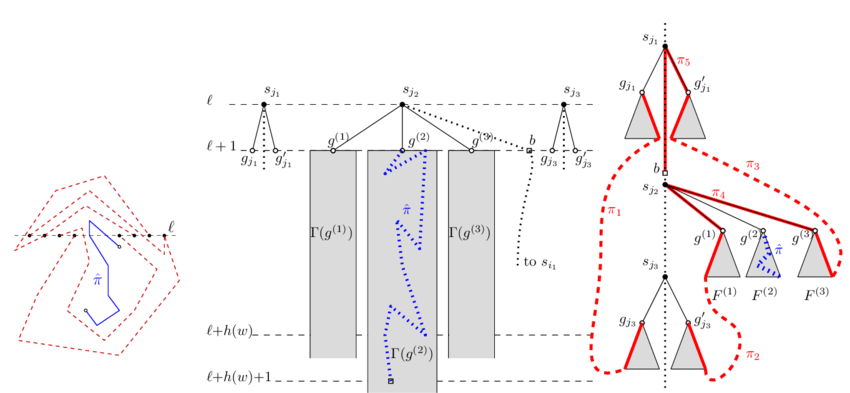


- Stochastic depth는 1202개의 레이어인 ResNet을 성공적으로 학습시킨 것입니다.

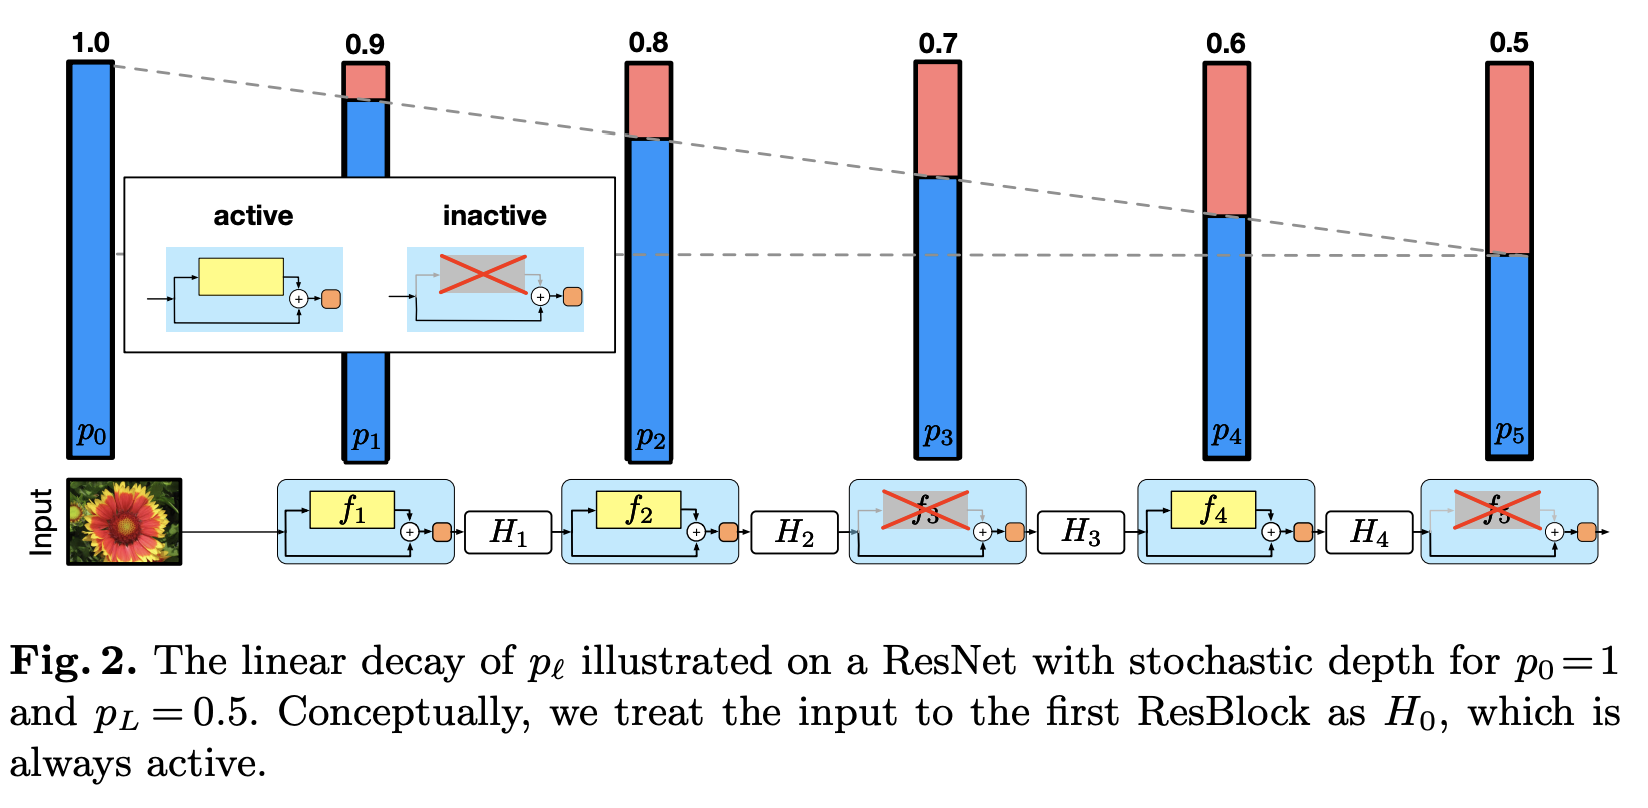

이 수 많은 레이어를 어떻게 학습을 시켰을까요?

이 연구에서는 모든 layer가 필요한 것이 아니며, deep network에는 중복되거나 불필요한 layer가 많이 존재함을 알았기 때문에 학습 중에 무작위로 layer를 drop하는 방법을 이용했고 훗날 이 부분은 DenseNet의 영감을 주었다고 합니다. 

- GoogleNet는 Inception module을 이용하여 다양한 크기의 filter로 구성된 feature map들을 연결하는 방식입니다

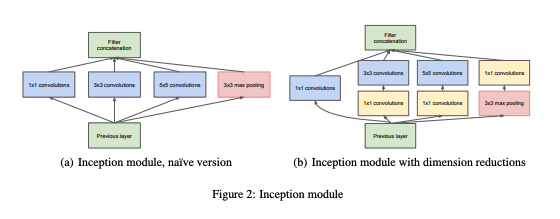

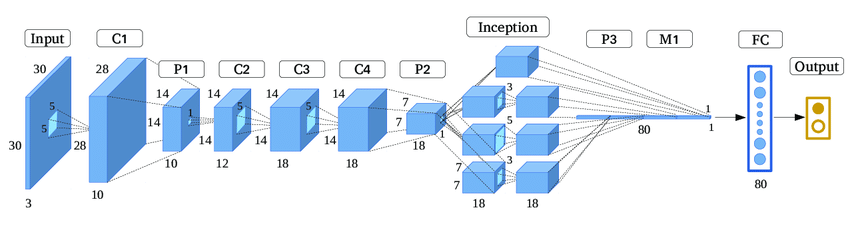

- Wide ResNet는 ResNet에서 레이어의 필터 개수를 늘리는 것만으로 깊이가 충분하고 성능 또한 향상시킬 수 있습니다.

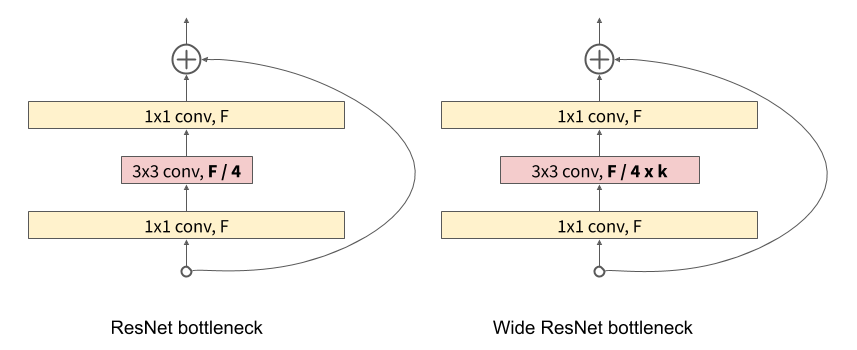

*width를 늘리는 것 또한 네트워크를 깊게 만드는 방법*

- FractalNet는 wide network structure를 사용하여 여러 데이터셋을 이용하여 유의미한 결과를 만들었습니다

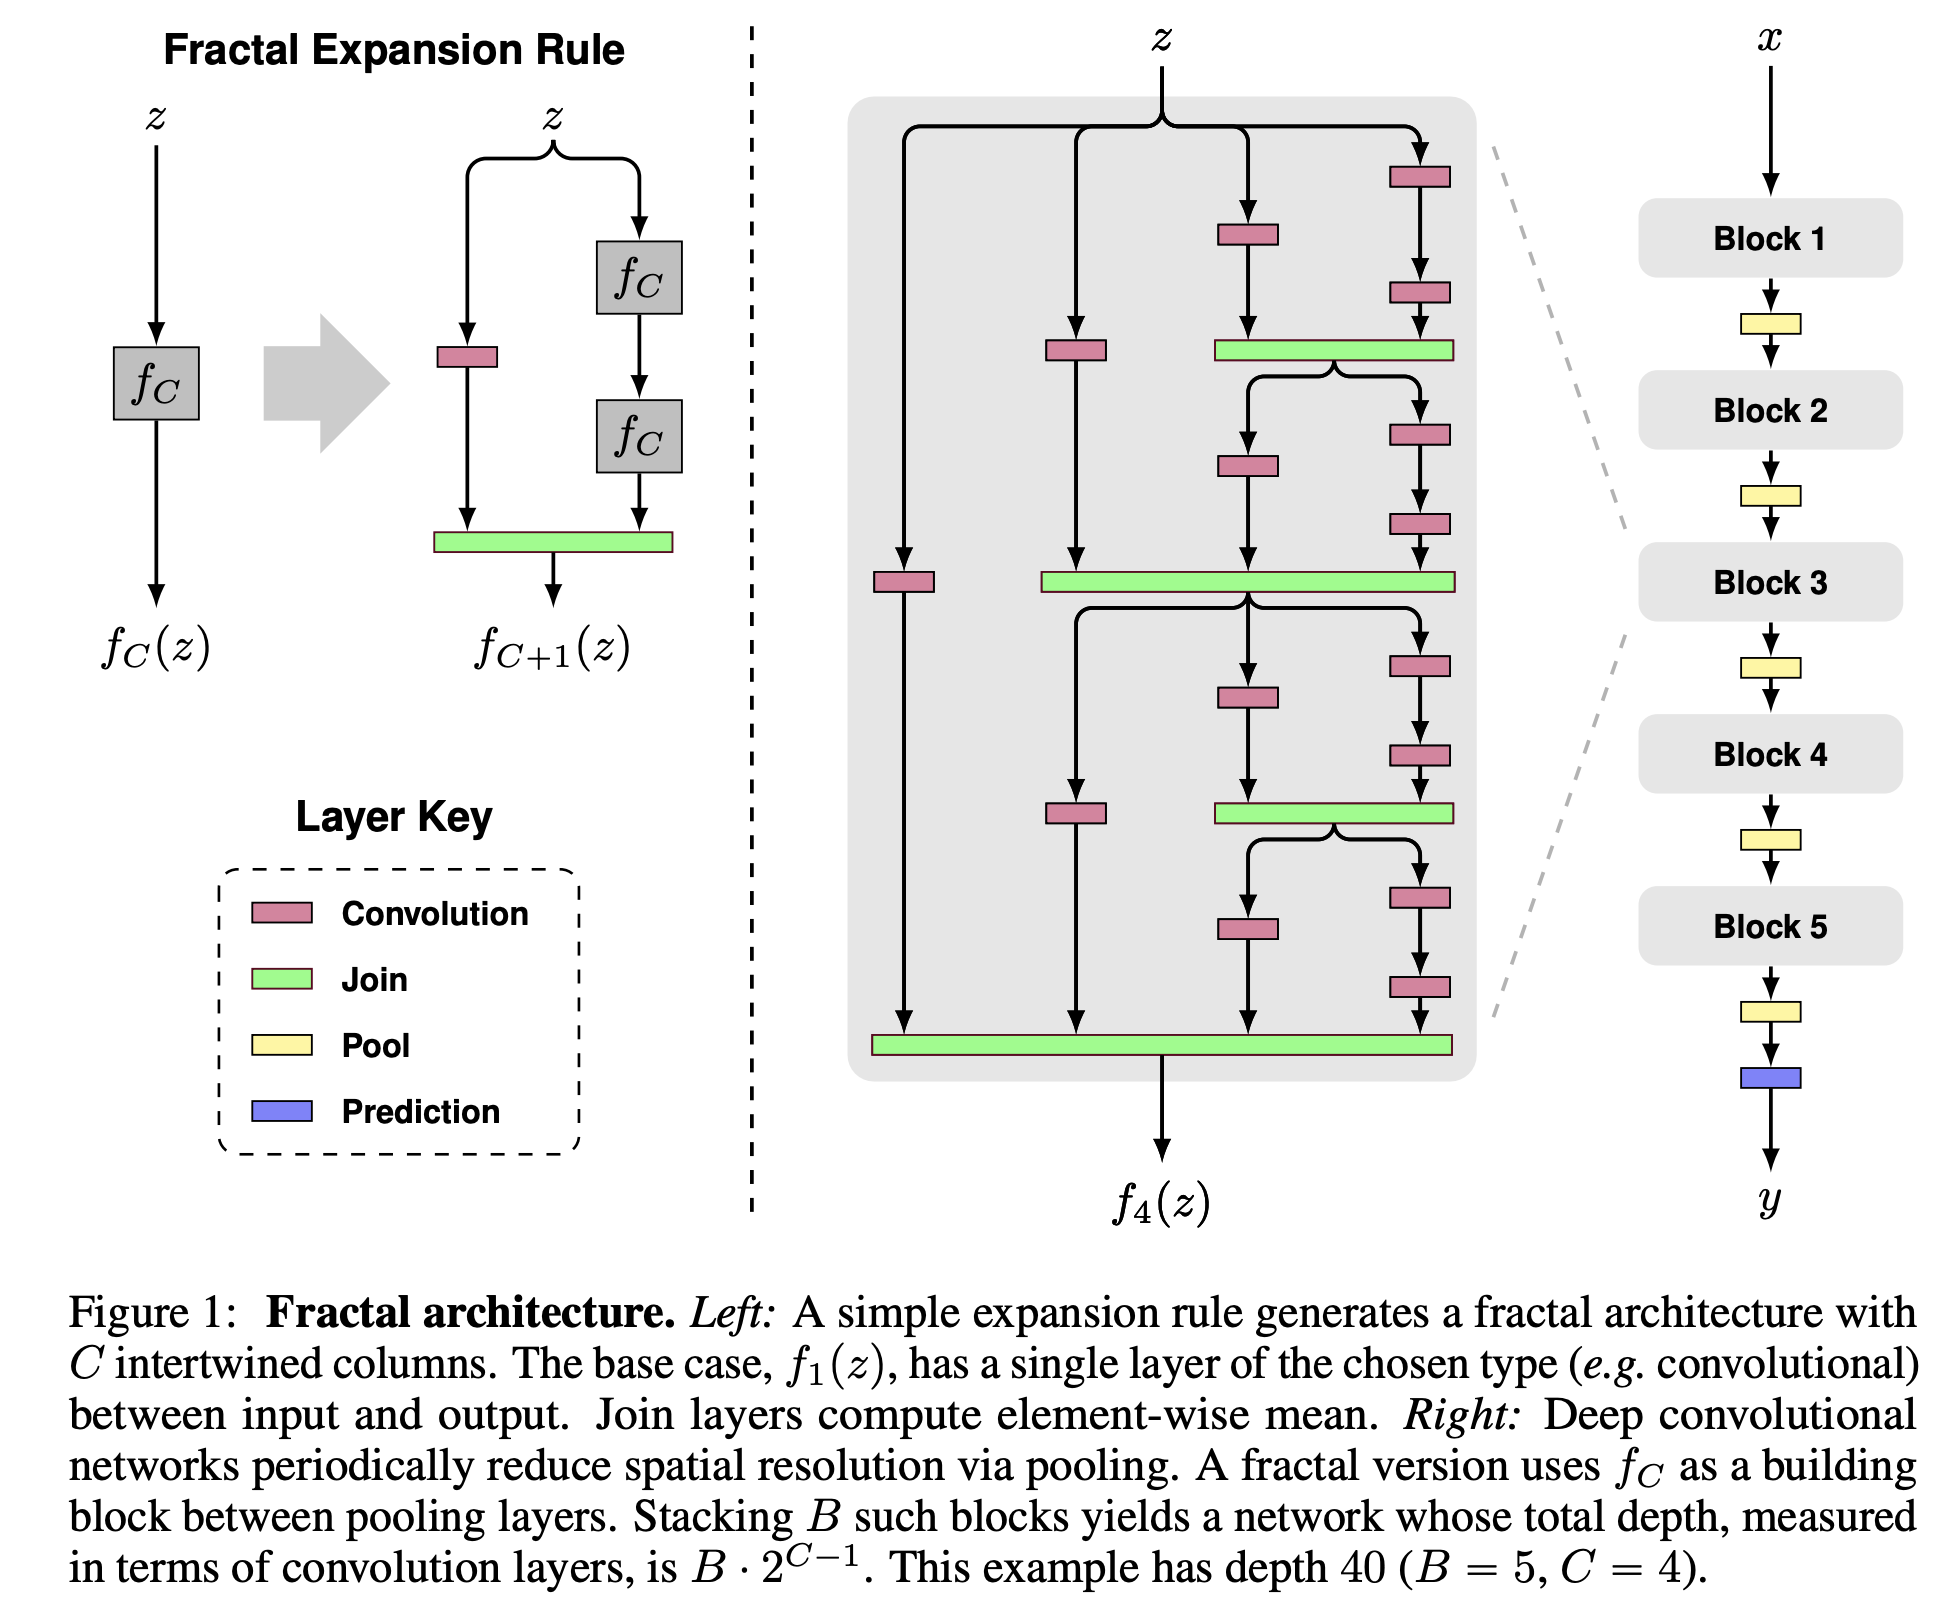

- DenseNet는 엄청 깊거나 넓은 구조에서부터 representational power를 이용하는 대신 feature reuse를 이용하여 네트워크의 잠재력을 사용하고, 효율적인 파라미터를 가진 압출 모델을 만든다.


그로 인해 다른 레이어에서 학습한 feature map를  연결하게 되면, 후속 레이어의 입력에서는 변형이 증가하고 효율이 향상이 됩니다.

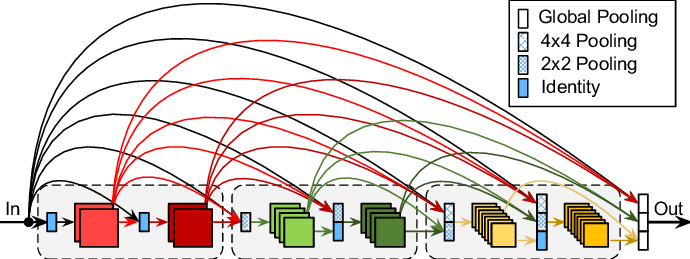

- Network in Network(NIN)은 복잡한 특징을 추출하기 위해서 컨볼루션 레이어의 필터를 micro MLP에 포함합니다.

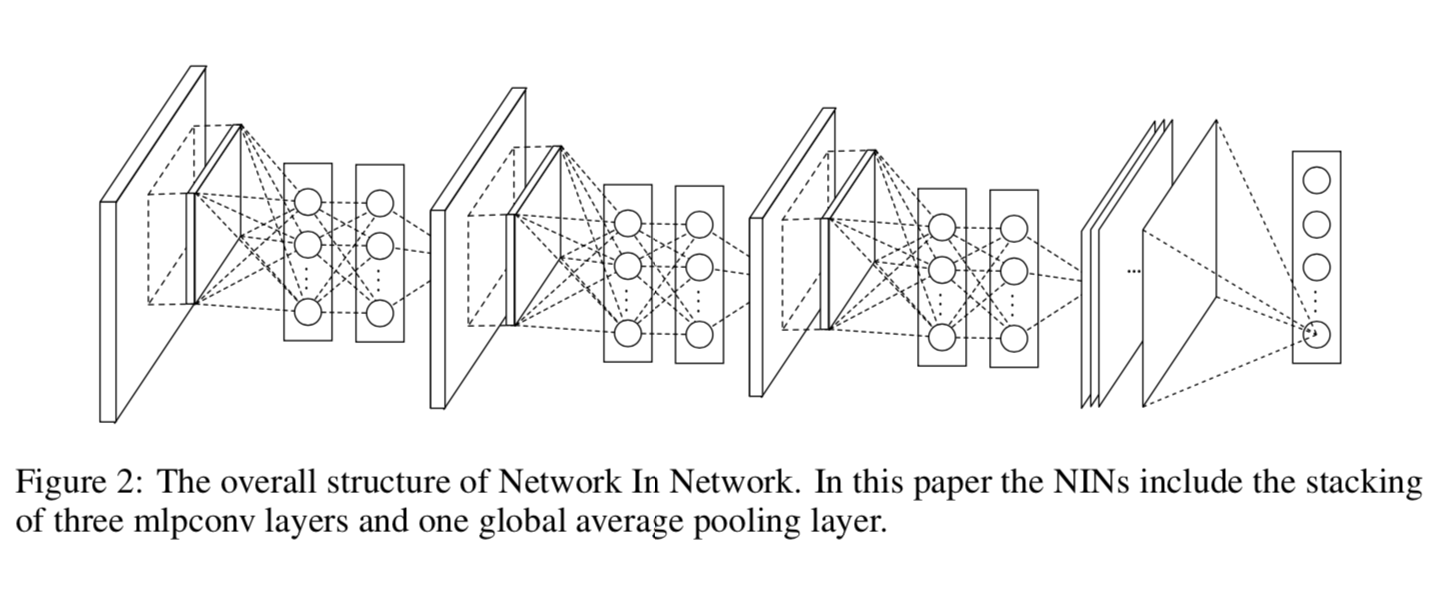

- Deeply Supervised Network(DSN)의 내부 레이어들은 보조 분류기에 directly supervised가 되기에 초반부 레이어의 그레디언트가 강화됩니다.

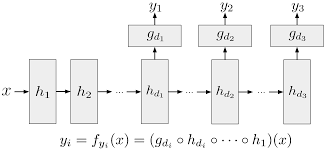

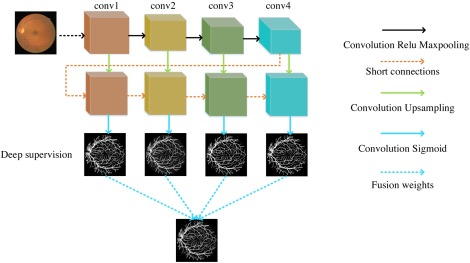

- Ladder Network는 오토코더를 연결하여 semi-supervised learning에 인상적인 성능을 보였습니다

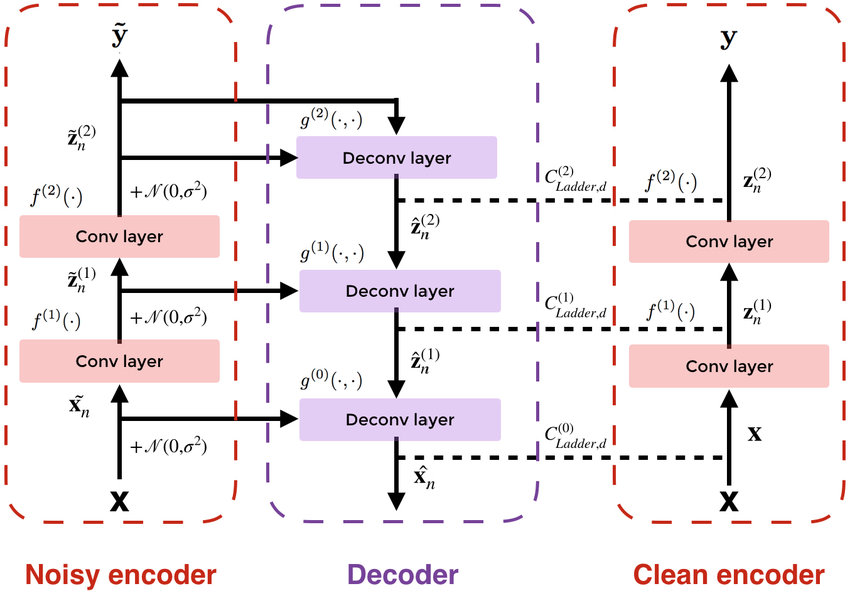

- Deeply-Fused Net(DFN)는 다른 베이스 네트워크의 레이를 결합하여 정보흐름을 향상시킨 연구입니다.

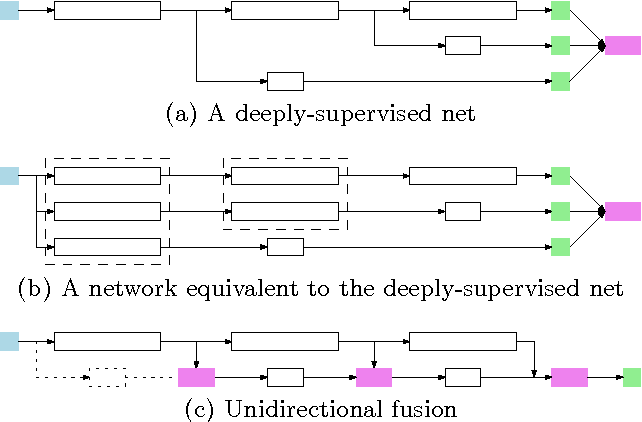

정말로 많은 네트워크들이 연구되었고 발전이 되었다.라고만 생각하고 넘어가셔도 됩니다. 

---

## DensenNets

입력이미지 x0가 conv layer를 통과하면서 L개의 layer(비선형변환이 포함된) 로 이뤄어진 네트워크를 구성합니다.

*비선형 변환 함수 : BN,ReLU,Pooling, Convolution같은 복합 함수*

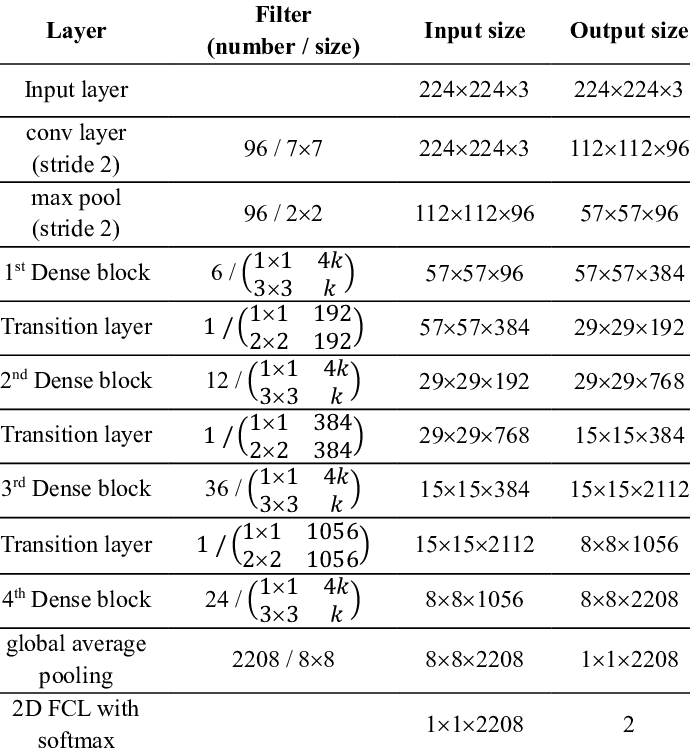



### ResNets

순방향 네트워크는 이전 레이어의 출력이 다음 레이어의 입력으로 연결되어 layer transition이 일어난다.



장점은, identity function을 이용해서 gradient가 뒤의 layer ~ 앞의 layer로 직접 흐를 수 있다.

단점은 네트워크의 정보 흐름을 방해할 수 있다.

### Dense connectivity

일반적으로는 conv network가 L개의 레이어에 대해 레이어 간 하나씩의 연결을 하게 되어 총 L개의 연결을 갖지만 DenseNet는 기본 블록은 L개의 레이어가 있고 레이어간 L(L+1)/2개의 직접 연결을 하는 구조입니다.

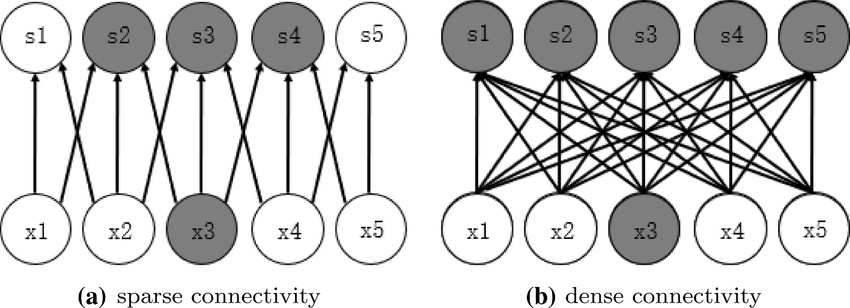


### Composite function

Dense connectivity를 함수의 식으로 표현한 것입니다.

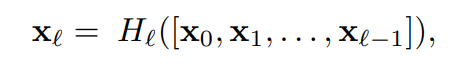

ResNet-v2를 기반으로, Hℓ(⋅)이 세 개의 연속 연산(BN,ReLU, 3X3 conv layer)으로 이뤄진 복합함수로 정의가 됩니다.

skip-connection , conv layer, BN, activation순으로 연구를 했습니다.

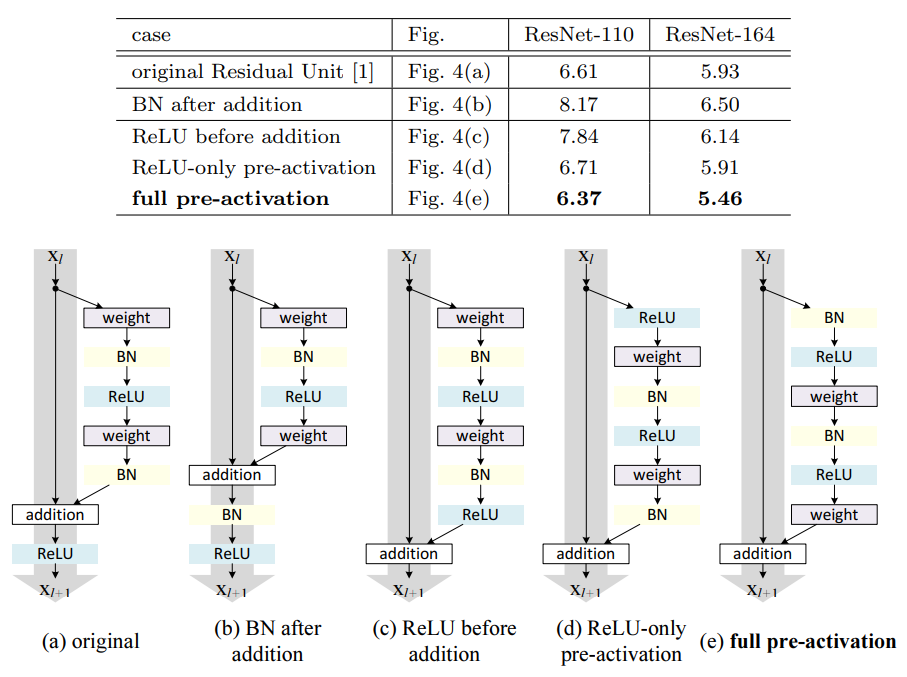

*Pre-activation = (e) , Xception = (d)*

장점은 경사 소실 문제를 개선하고 특성이 재사용이 되도록 도와줍니다.

DenseNet는 하나하나를 차원으로 쌓아서 하나의 텐서로 만들고 합성함수는 이것을 통해서 BN, ReLU활성화함수, 3X3 conv layer를 통해 pre activation 수행합니다.

### Pooling layers

convatenatino operation은 feature map의 크기 변경이 되면 실행이 불가능하지만 conv network는 feature map의 크기를 변경하는 down-sampling layer가 필수로 사용이 됩니다.

그렇기에 네트워크를 multiple dense block로 나누어서 down_sampling를 용이하게 해줍니다.

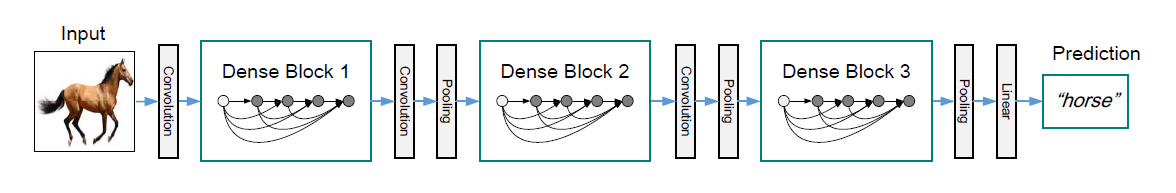

인접한 두 블럭 사이의 레이어는 transition layer라고 하고, convolution 과 pooling을 통해서 feature map의 크기 변경을 합니다.


마지막으로, 실험에서 사용된 transition layer은 BN, 1X1 conv layer, 2XX2 avg pooling layer가 따른르는 형태입니다.


### Growth rate

각 함수 Hℓ이 k개의 feature map를 생성하면,ℓth layer는 k0 + k×(ℓ−1)개의 feature-map을 입력으로 가집니다.

*k0는 해당 dense block의 입력 특성 맵 개수이다
hyperarameter k를 네트워크의 growth rate이다*

실험결과 부분에서 적은 growh rate로 state-of-the art 좋은 성능을 얻는 것을 보여줬는데 그 이유는 각 layer들이 이전 feature map을 따르기 때문에 "collective knowledge"가 되는 것입니다.


Feature-map을 네트워크의 global state로 볼 수 있고, layer는 각자의 k feature-map에 이 state를 추가를 합니다.

Growth rate는 각 layer가 global state에 기여하는 new information의 양을 조절한다.


한 번 쓰여진 global state는 네트워크의 어디에서나 액세스 할 수 있으며 연쇄적으로 연결되어 있기에, 기존의 네트워크 아키텍처와 달리 layer-to-layer로 복제할 필요가 없다.

![](https://images.velog.io/images/qsdcfd/post/b812ebfb-d355-4fd5-914b-7a5a36f5d7e5/image.png)


### Bottleneck layers

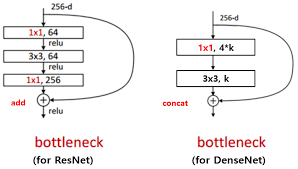

layer의 출력은 k개의 feature-map

layer의 입력은 k개보다 많은 feautre map

ResNet과 Inception에서는 각 3x3 convolution 전에 1x1 convolution을 bottleneck layer로 도입하니 입력 feature-map의 개수를 줄이고 계산 효율을 향상시킬 수 있다는 것을 알게 되었고 DenseNet 또한 효과가 있습니다.

DenseNet의 bottleneck layer

BN-ReLU-Conv(1x1)-BN-ReLU-Conv(3x3)으로 이루어진 Hℓ
을 이용하며, 이를 DenseNet-B라고 칭한다.

실험에서는 각각의 1x1 convolution이 4k개의 feature-map을 생성합니다.

예를 들면,

이전 dense block의 출력인 feature-map의 개수가 256개이고 256개을 입력으로 이용하는 dense block의 경우, bottleneck layer의 사용 여부에 따른 parameter 차이는 다음과 같이 계산된다.

Growth rate k = 32로 계산한다.

Bottleneck - X : (3x3x256x32) = 73728

Bottleneck - O : (1x1x256x128) + (3x3x128x32) = 69632


bottleneck layer의 효율성은  Dense block의 개수와 k에 따라 달라지지만 그렇더라도 효율성이라는 관점에서 볼 땐 상당히 좋다.


### Compression

trainsition layer에서 feature map의 개수를 줄이면 모델을 소형으로 만들 수 있게되고, Dense block가 m개의 feature map를 포함하면 [θm]개의 특성맵이 생성됩니다.

compression factor은 0 < θ < 1이다.

θ= 1, feature map의 개수 변경이 되지않는다

θ < 1, DenseNet-C , 실험에선 θ=0.5

DenseNet-BC : bottleneck layer과 θ<1인 trainsition layer를 모두 사용한다.

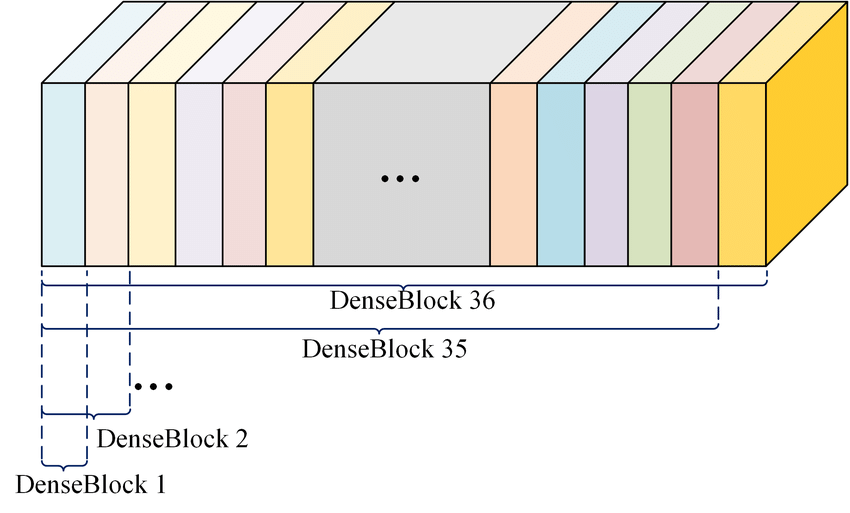


### Implementation Details

#### Dataset 실험(ImageNet빼고), DenseNet = 같은 수의 layer + 3개의 dense block입니다.


- Convolution(Dense block1 들어가기 전) 

    - 입력 : Input image 
    
    - 출력: 16개(DenseNet-BC or growth rate2배)의 feature map

- Conv layer(with kernel size =3x3), zero-padding을 사용하여 feature map의 크기 고정시킨다.

- 연속되는 dense block 사이에 transition layer(with 1x1 convolution and 2x2 average pooling)을 사용한다.

- Dense block3, global average pooling -> softmax classifier

- feature map size of Dense block: 32x32, 16x16, 8x8


- 실험에 사용한 configuration을 설명하겠습니다.

- Hyperparameter은 L(layer 개수) 과 k(growth rate) 


   - Basic DenseNet
   
      - L =40, k= 12
      
      - L = 100, k =12
      
      - L = 100, k = 24
      
   - DenseNet-BC
   
      - L=100, k=12
      
      - L=250, k=24
      
      - L=190, k=40


#### Image Net 실험

입력: input image(224x224 size)

Dense block : 4개가 있는 DenseNet-BC구조

초기 conv layer: stride =2 , 2k convolution(kernel size =7 x 7)
*k는 layer의 feature map개수*

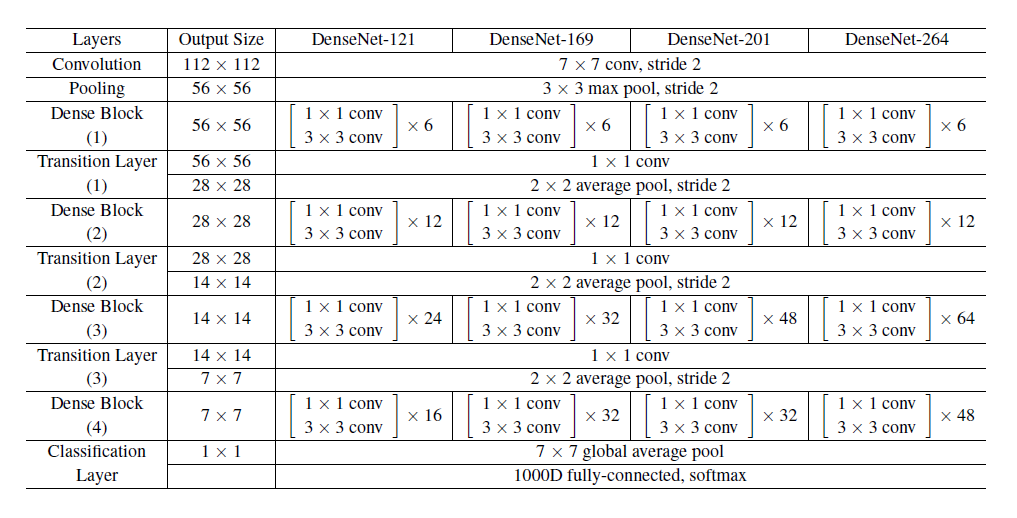

모든 네트워크에서 growth rate(k=32)이고, conv layer는 모두 BN-ReLU-Conv로 이루어진 동작에 해당됩니다.

---

## Experiments

여러 개의 벤치마킹 데이터셋을 통해서 DenseNet의 효과를 입증하고, 중점을 둔 것은 state-of-the-art 에서 ResNet과 ResNet의 변형 모델들과 성능 비교를 합니다.

*state of the art*
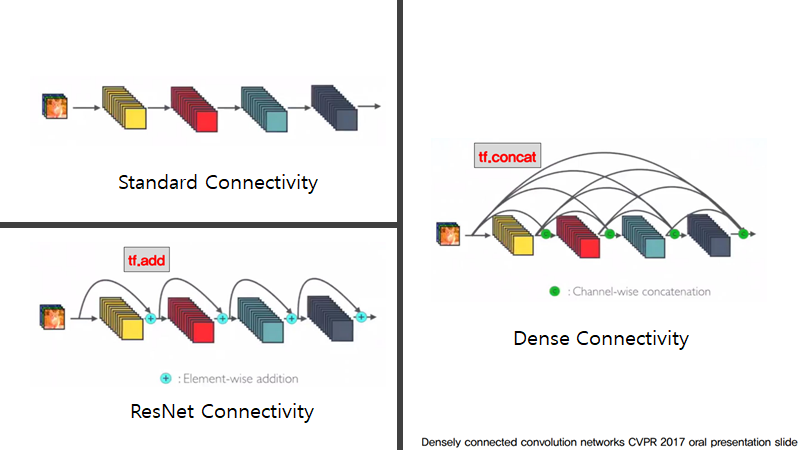

### DATASETS

#### CIFAR(두 개의 dataset(10,100))

- color natural image( with 32x32 pixel)

- Training set , test set : 50000, 10000 제공되고 실험에서 holdout validation set를 5000개의 training data set에서 가져와 사용합니다.

- Standard data augmentation기법 사용하고 적용한 시럼의 결과는  "+"로 표시해서 구분했습니다.

- mirroring/ shifting기법 참고

- Normalization of channel mean and standard deviation으로 전처리합니다.

- 50000개의 훈련 데이터 셋을 모두 사용하고 종료 시 테스트 erro 측정합니다.


#### SVHN

- color number image(with 32 x 32)

- Training, Test set은 73257, 26032 개의 이미지가 있고 additional training이라는 531131개의 이미지도 제공됩니다.

- Training set(without data augmentation)만 사용하고 이 중에서 6000개를 validation set으로 분리합니다.

- Maxout, NIN참조

- 학습 중에 Validation error가 가장 낮은 모델을 선택하여 test error측정합니다.

- Wide ResNet에 따라 pixel 값/255 , [0,1]범위로 전처리 했다.

#### ImageNet

- class : 1000개로 구성한다

- Training, validation set은 120만개, 5만개로 구성된다.

- ResNet과 동일한 data augmentation기법 적용하여 test시 single-crop(224X224) 혹은 10-crop적용한다

- Validation set에 대한 classification error측정한다

---

### Training(SGD로 학습이 됩니다.)

#### CIFAR/ SVHN

- Batch size = 64

- epoch = 300 / 40

- learning rate = 0.1이었다가 epoch가  50% 와 75%도달 시점에 10으로 나눕니다.


#### ImageNet
 
- Batch size = 256

- epoch = 90

- lr = 0.1이었다가 epoch = 30 & lr = 0.01 , epoch = 60 & lr = 0.001



#### Common

- Nesterov momentum = 0.9( with weight decay = 10e-4 and dampenning) by Training and investigating Residual Nets

- weight 초기화 방식: He initialization

#### 추가 정리

Data augmentation 제외 실험(C10,C100,SVHN)은 첫 번째를 제외한 conv_layer뒤에 dropout_layer추가(rate =0.2)

Test erro는 task 와 model setting에 한 번씩 측정됨

naive implementation는 memory inefficiency가 포함이 될 수도 있습니다. (GPU의 memory 소비 줄입니다.)



#### 논문 L의미 정리

실제 논문에서 L로 정의하여 layer(with trainable parameter)개수만 센다.

L=(layers in all Dense Block)* 2 + (num of Transition Layer) + 2

예를 들면,

CIFAR나 SVHN의 경우는 3개의 dense block가 있고 각 block는 동일 수의 layer가 있고  transition layer은 2개만 있습니다.

L=100인 CIFAR/SVHN의 경우에는 각 dense block에 16개의 layer가 할당되고 L=190이나 L=250인 경우에는 각각 31개와 41개씩 할당됩니다.

추가적으로, Denseblock의 각 layer는 bottleneck layer(1x1, 3x3 conv layer)이므로, 2개의 레이어로 계산이 됩니다.

Transition_layer는 1x1 conv_layer만 있고 더해진 2개는 conv_layer1 과 softmax classifier입니다.





###  Classification Results on ImageNet

이 부분에선 DenseNet-BC의 성능이 state of the art ResNet와 ImageNetclassification task비교를 합니다.

이 부분에서 또한 다양한 depth L과 growth rate k에 대한 실험 결과를 보여줍니다.

공정한 비교를 위해서 preprocessing 와 optimization setting의 차이같은 요소를 모두 재거했습니다.(by Torch implementation for ResNet)

실험은 간단하게 ResNet부분을 DenseNet-BC로 바꾸었고 모든 세팅은 ResNet과 동일하게 했습니다.

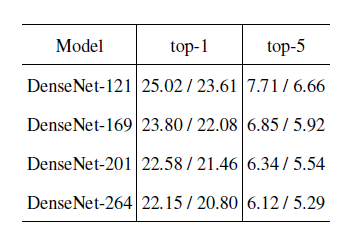

*ImageNet에 대한 single-crop 와 10-crop validation error*

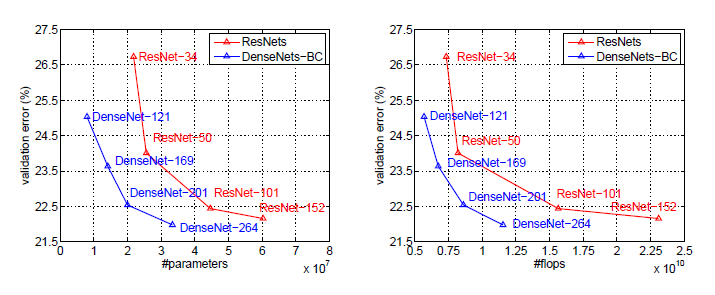

*DenseNet와 ResNet의 single-crop top 1-validation error by parameters and flops*

이를 통해서 알 수 있는 것은 DenseNet가 SOTA ResNet와 비교했을 때  parameter수와 계산량을 훨씬 적게 쓰면서 동등한 성능을 보입니다.

이게 얼마나 큰지 감이 오지 않으시다면 이렇게 ㅍ현하겠습니다.

ResNet-50과 유사한 파라미터의 수와 계산량을 갖는 DenseNet이 ResNet-101과 동등한 성능을 보이는 것입니다.

즉, 2배 이상의 성능을 보유하는 것입니다.

더 놀라운 것은 ResNet은 이미 hyperparameter가 세팅이 된 상태이어서 ResNet은 최적화가 된 상황이지만 DenseNet은 모델에 맞는 최적화가 되지 않은 상태에서 이정도의 결과를 냈습니다.

그러므로 더 좋은 hyperparameter을 이용했으면 성능이 추가로 향상이 되니 ResNet보다 몇 배가 좋은지 감을 잡을 수 없을 정도로 좋습니다.


### Classification Results on CIFAR and SVHN

DenseNet이 CIFAR과 SVHN 데이터셋을 가지고 한 실험결과를 알려드리겠습니다.

다양한 depth L 과 growth rate k를 갖고 실험했습니다.

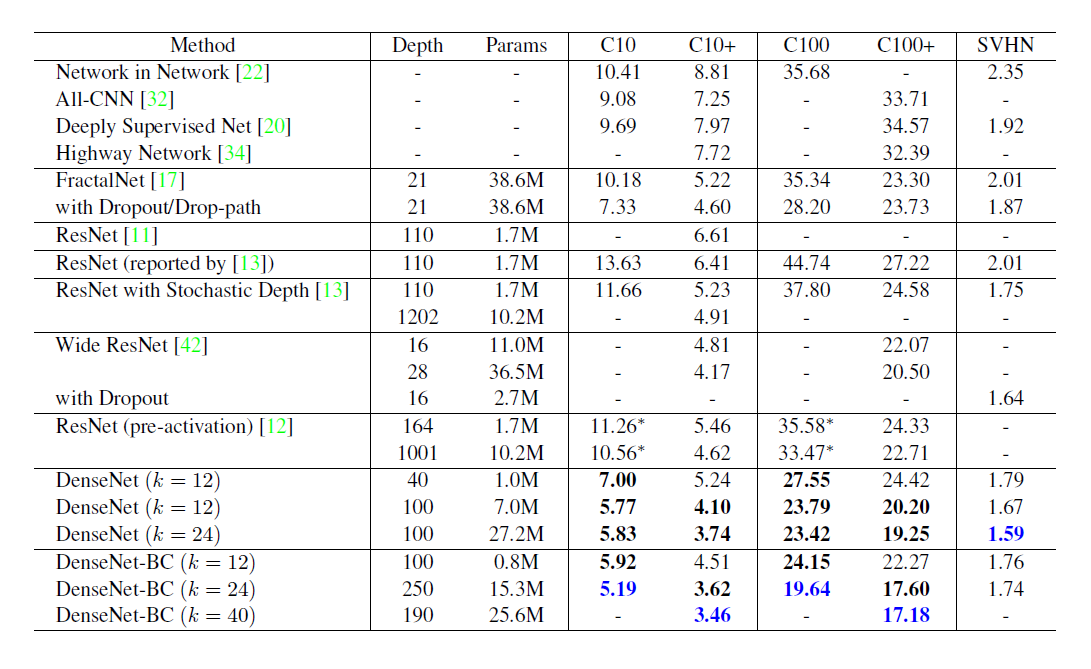

Bold 표시 : 모든 method의 성능을 뛰어넘은 결과를 나타낸 것으로 최상의 결과는 파란색으로 표시이다

"+" 표시 열: standard data augmentation(translation and/or mirroring)적용한 경우를 뜻합니다.

"* " 표시: 직접 수행해서 얻은 결과를 나타냄

Dropout포함 경우: C10,C100, SVHN

DenseNet는 파라미터가 ResNet보다 적어도 성능은 좋고 data augmentation을 적용하지 않을 땐 성능이 큰 차이로 좋습니다.

#### Accurcay

- CIFAR Dataset

가장 좋은 성능은 DenseNet-BC(L=190, k =40)입니다.

C10+ error = 3.46% and C100+ error = 7.18%인데 이것은 Wide ResNet의 오류율보다 엄청 낮았고 drop-path regularization 사용한 FractalNet보다 30%낮은 오류율입니다.

- SVHN(with Dropout)

DensNet(L=100, k=24)이 Wide ResNet의 최고 성능을 넘어섰지만 L=250인 경우에는 더 낮은 depth버전 보다 성능향상이 되지 않은 것으로 보아 overfitting이 일어난 걸로 볼 수 있습니다.

#### Capacity

DenseNet의 성능이 L과 k가 증가함에 따라 비례적으로 증가합니다.(단, Compression 과 bottleneck layer없음)

Model capacity의 증가로 인한 것이여서 데이터셋이 C10+와 C100+에 대한 결과에 가장 잘 드러납니다.

C10+경우, parameter의 개수는 1.0M~7.0M~27.2M으로 증가하고, 오류는 5.24%~4.10%~3.74%로 떨어지고 C100+도 비슷합니다.

이를 통해서 알 수 있는 것은 이제 DenseNet이 크고 깊은 모델에 사용된 네트워크를 활용할 수 있게 될 뿐만 아니라
더이상 과적합이나 최적화의 어려움을 겪지 않아도 됩니다.

#### Parameter Efficiency

DenseNet-BC(with transition layer)은 Bottleneck와 dimension reduction기능을 갖췄고 parameter을 효율적으로 사용합니다.

EX)

성능차이

250-layer model with 15.3M parameter > FractalNet or Wide ResNet(30M parameter)

DenseNet-BC(L=100,k=12) == pre-activation ResNet(1001 layers)

DenseNet-BC vs 1001-layer ResNet-v2

C10+ : 4.51% vs 4.62%

C100+ : 22.27% vs 22.71%

#### Overfitting(DenseNet에선 잘 안 나타남)

DenseNet(without data augmentation)은 이전 모델보다 성능 개선이 좋다. 

실험 결과를 인용하면, C10에서는 7.33%에서 5.19%로 약 29%의 상대적 오류 감소를 보였으며, C100에서는 28.20%에서 19.64%로 약 30%의 상대적 오류 감소를 보였습니다.

물론, 단일 환경에선 overfitting과 유사한 현상이 나타나긴 했습니다.


C10, k=12 - > k=24로 인해서 parameter 4배 증가했고 오류율은 5.77%~>5.88%로 소폭 상승했습니다.

그러나 DenseNet BC의 bottleneck 와 compression layer이 overfitting에 대처를 잘합니다.

## Discussion

DenseNet가 연쇄성(concatenation)연결이 주는 효과에 대해서 말하겠습니다.


### Model compactness

입력을 concatenation하면, 학습된 feature map는 모든 후속 layer에 접근이 가능하여 feature reuse가 가능해지니까 compact한 모델이 됩니다.

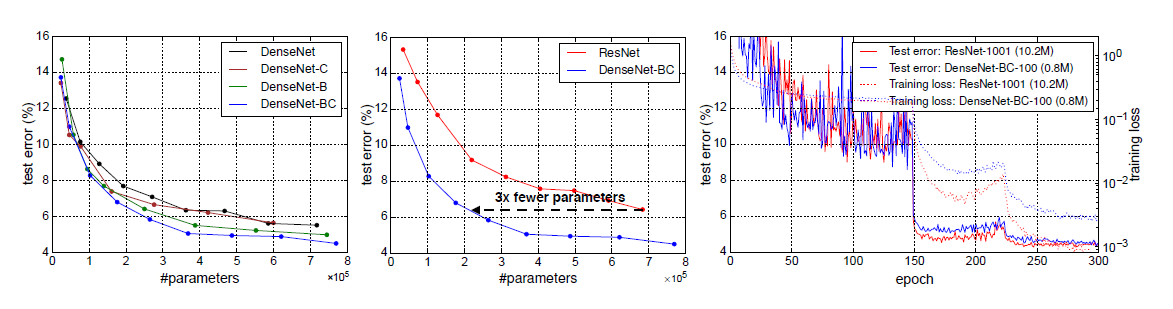

위의 사진을 정리하자면,

DenseNet-BC가 DenseNet의 변형 중 parameter efficiency가 가장 좋습니다.

DenseNet-BC가 1/3파라미터만 가지고 ResNet의 성능과 유사합니다.

DenseNet-BC(with Trainable paramete = 0.8M)가 ResNet(prameter = 10.2M)과 유사한 성능을 보였습니다.


### Implicit Deep Supervision


이것 또한 DenseNet의 성능을 개선시킨 것으로, layer들이 short connection을 이용하여 loss function으로부터 추가적인 supervision으로 이뤄진 "deep supervision"이 DensNet에 있습니다.


이것의 장점은 은닉계층 + classifier을 통해 layer들을 즉각적으로 판별할 수 있는 feature을 익히게  하는 DSN구조를 생성했습니다.

모든 레이어는 direct supervision을 제공을 받는데 그 이유는 single classifier이 transition layer(2~3)를 통하기 때문입니다.

이렇게 많이 추가가 되는데 DenseNet이 생각보다 복잡한 형태가 아닌 이유는 모든 layer간에 동일 loss와 gradient가 공유되고 있기 때문입니다.

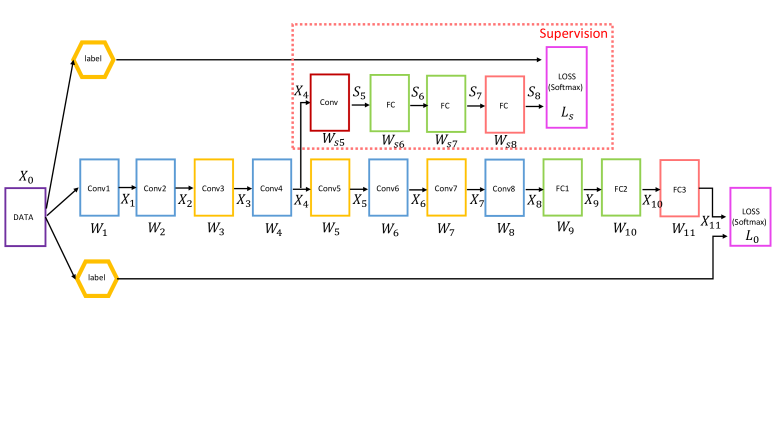


#### Stochastic VS Deterministic connection

Stochastic depth는 ResNet layer를 랜덤하게 drop하여 레이어간의 direct connection을 만드는데, 이때 pooling layer는 drop되지 않아서 densent connectivity pattern과 비슷한 것을 갖게 됩니다.

그래서, DenseNet와 ResNet의 Stochastic depth은 전혀 다름에도 불구하고 stochastic regularizer의 효과에 대한 관점을 제공하는 부분은 같습니다.


#### Feature Reuse

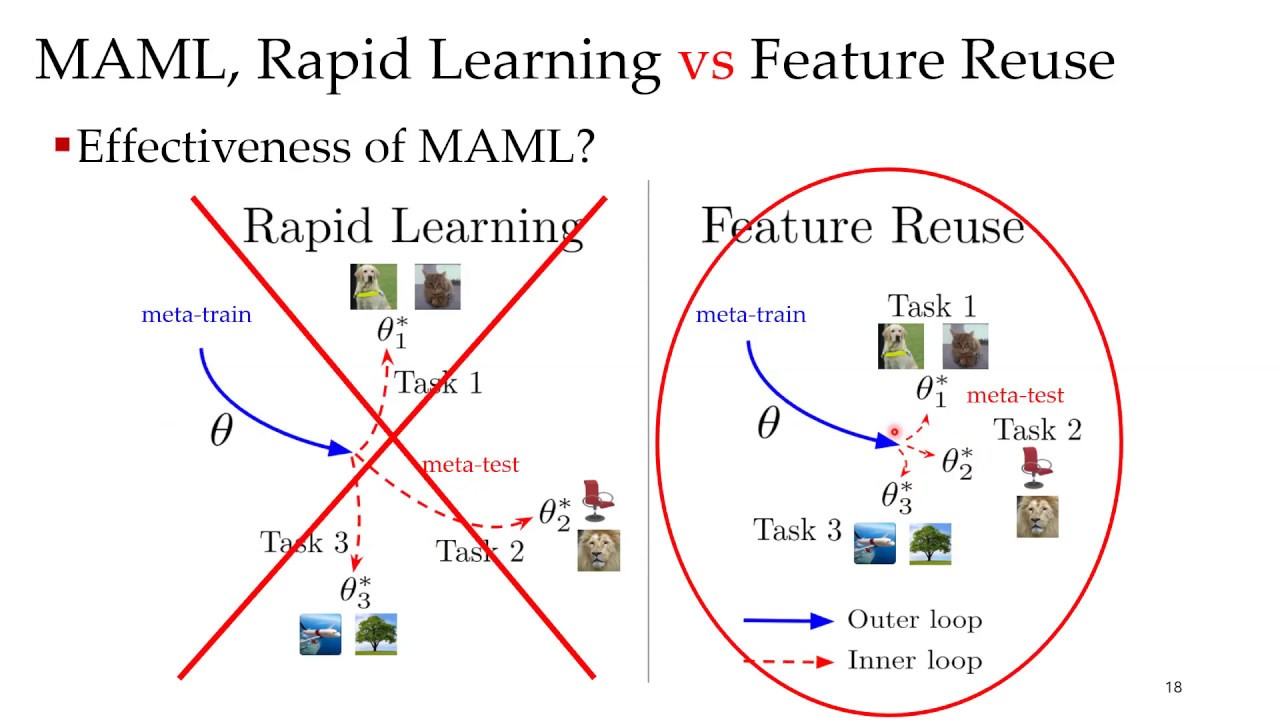

전제 조건: DenseNet의 layer은 모든 layer의 feature map에 도달할 수 있다.


논문에서는 L =40, k=12인 DenseNet C10+학습한 것을 예시로 들어서 설명합니다.

Dense block내의 conv_layer(ℓ)과 layer(s)가 연결이 되어있는데 이때 생기는 average absolute weight를 계산합니다.

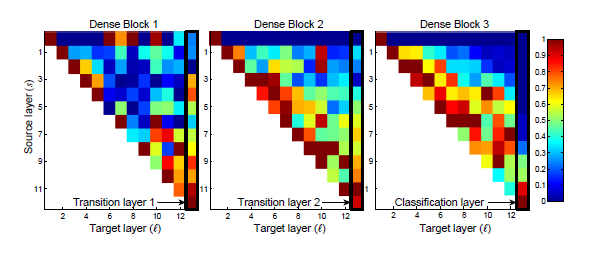

위의 사진은 pixel(s,ℓ)의 색이 weight의 average L1 norm을 인코딩한 것입니다.

검정색 사격형은 두 개의 transition과 classification layer에 해당이 됩니다.

첫 번째 행은 dense block의 input layer이 연결이 된 weight를 인코딩한 것입니다.

pixel(ℓ,s)가 빨간색인 것은 ℓ이 s보다 강력하게 feature map를 사용한다는 것입니다.

계속해서 히트맵을 통해서 알 수 있는 정보들에 대해서 서술하겠습니다.

- 모든 레이어는 weight를  동일한 block의 input에 분산시켜서 매우 초반의 layer가 추출한 feature를 dense block 전체 layer들이 사용을 합니다.

- 정보들이  간접적인 방향으로 first to last layer로 이동하기 위해서는 transition layer의 weight나 선행 dense block의 layer에 weight를 분산시킵니다.


- 두 번째나 세 번째 dense block내의 layer는 transition layer의 출력에 최소한의 weight만 일관되게하면, Transition layer가 중복된 feature를 많이 출력하게 됩니다.                           

이렇게 되면, DenseNet-BC(with compression)의 결과와 정확하게 일치가 됩니다.


- final classification layer은 최종 feature map에 집중하여 늦게 생성된 high-level feature들이 더 있음을 내포합니다.



## Conclusion

결론 부분입니다. 주로 실험결과를 요약을 하는 부분이지요.

DenseNet는 CNN기반의 아키텍처이고 특징에 대해서 서술하겠습니다.

- 동일한 feature map size인 두 layer 사이에 direct connection을 합니다.

- layer가 수백 개로 확장이 되어도 optimization difficulty는 없습니다.

- parameter가 증가해도 overfitting나 성능 저하없이 성능이 향상이 되는 경향이 있습니다.

- 적은 수의 parameter과 계산량으로  SOTA성능을 달성한다. 

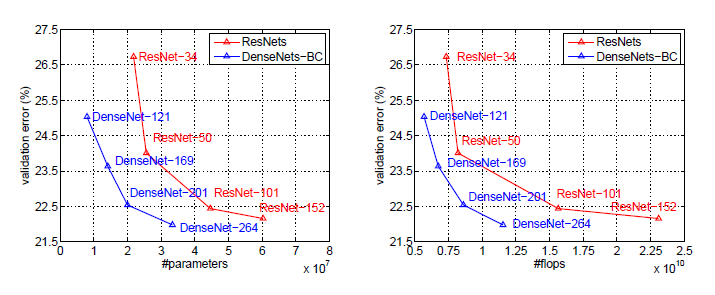

- 본 논문에서는 ResNet hyperparameter를 채택하였기에 DenseNet에 맞는 hyperparameter를 설정하면 더 좋은 성능이 보일 것입니다.

- DenseNet는 identity mapping(ResNet), deep supervision(DSN) 그리고 diversified depth(Stochastic Depth) 특징을 잘 통합시킵니다. 

- 통합성이 있기에 feature reuse가 가능하게 되어서 더 조밀한 모델을 학습할 수 있게 되어 모델의 성능이 증가합니다.

- DenseNet는 conv_feature를 통해 다양한 feature extrator이 되기 때문에 CV task에 적합한 네트워크이다.